# Project: Wrangle and Analyze Data

### Project Steps Overview

1) Gathering

2) Assessing data

3) Cleaning data

4) Storing data

5) Analyzing and Visualizing data

6) Reporting

# Data Gathering

### Loading Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import requests
import json
from IPython.display import Image

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the (twitter_archive.csv) data 1

In [2]:
# Reading the twitter_archive data
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

### Programmatically download (image-predictions.tsv) data 2

In [3]:
# # Using Requests library to download the tweet image prediction
# url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# response = requests.get(url)

# with open("image-predictions.tsv", mode="wb") as file:
#     file.write(response.content)

In [4]:
# Read the image_pred dataset
image_pred = pd.read_csv("image-predictions.tsv", sep="\t")

### Twitter API (tweet_json.txt) data 3

In [5]:
# Read Json line by line and convert into a Dictionary
with open("tweet_json.txt", "r") as file:
    lines = file.readlines()
    data = []
    for line in lines:
        data.append(json.loads(line))

# Convert the dictionary into a DataFrame        
    data_json = pd.DataFrame(data, columns=["id",
                                            "retweet_count",
                                            "favorite_count"])

In [6]:
# Save data_json into a csv format
data_json.to_csv("tweet_json.csv", index=False)

In [7]:
# Read tweet_json dataset
tweet_json = pd.read_csv("tweet_json.csv")

# Accessing

### Visual Assessment and Programmatic Assessment of (Twitter_arch Data 1)

In [8]:
# Shape and head of the dataset
print("Twitter_arch shape:", twitter_arch.shape)
twitter_arch.head(3)

Twitter_arch shape: (2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
twitter_arch.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
twitter_arch[["pupper", "floofer", "doggo", "puppo"]].value_counts()

pupper  floofer  doggo  puppo
None    None     None   None     1976
pupper  None     None   None      245
None    None     doggo  None       83
                 None   puppo      29
pupper  None     doggo  None       12
None    floofer  None   None        9
        None     doggo  puppo       1
        floofer  doggo  None        1
dtype: int64

In [11]:
twitter_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [12]:
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_arch.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [16]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Visual Assessment and Programmatic Assessment of (image_predictions data 2)

In [17]:
# Shape and head of the dataset
print("Image_pred shape:", image_pred.shape)
image_pred.head()

Image_pred shape: (2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False


In [19]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# have a view of this image
image_pred.loc[200, "jpg_url"]

'https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg'

In [22]:
Image(url='https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg')

### Visual Assessment and Programmatic Assessment of (tweet_json data 3)

In [23]:
# Shape and head of the dataset
print("tweet_json shape:", tweet_json.shape)
tweet_json.head()

tweet_json shape: (2354, 3)


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Quality issues (Dirty data)

#### twitter_arch data 1

1) The dtype column of timestamp is not correct (Datatype instead of datetime)

2) Remove Outlier in the rating_numerator column i.e value greater than 15

3) Convert the name column into lowercase

4) Filter the rating_denominators columns with only the rating value of 10

#### image_predictions data 2

5) Underscores are used in joint-word names in columns p1, p2 and p3 instead of spaces.

6) Some names in P1, P2 and P3 columns start with uppercase latter while others start with lowercase.

####  tweet_json data 3

7) Rename "_id" column to tweet_id in the dataset

8) Drop ("in_reply_to_status_id", "in_reply_to_user_id", expanded_urls) columns has over 90% missing values.

9) Remove the rows containing (RT @) in the text columns

## Tidiness issues (Messy data)

1)  Merge these ("pupper", "floofer", "doggo", "puppo") four columns into Dog_class columns

2) The three (3) dog datasets are related but divided into three separate frame work.

# Clean Data

#### Create a copies of the dataset

In [26]:
# Make a copy of the original dataset
clean_twitter_arch = twitter_arch.copy()
clean_image_pred = image_pred.copy()
clean_tweet_json = tweet_json.copy()

In [27]:
clean_tweet_json.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [28]:
clean_image_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [29]:
clean_twitter_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Cleaning Tidiness issues (Messy data)

#### 1) Join these ("pupper", "floofer", "doggo", "puppo") four columns in the twitter_arch dataset

### Define:

Merge ("pupper", "floofer", "doggo", "puppo") into one Dog_stage columns

### Code:

In [30]:
clean_twitter_arch.loc[(clean_twitter_arch[['doggo', 'floofer', 'pupper', 'puppo']] 
                                                                != 'None'
                                                               ).sum(axis=1) > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None


In [31]:
# merge different dog types into a column dog_class
clean_twitter_arch['dog_class'] = clean_twitter_arch[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
clean_twitter_arch['dog_class'] = clean_twitter_arch['dog_class'].str.replace("None,", "", regex=True)
clean_twitter_arch.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [32]:
clean_twitter_arch['dog_class'].value_counts()

None             1976
pupper,None       245
doggo              83
puppo,None         29
pupper,doggo       12
floofer,None        9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

In [68]:
clean_twitter_arch['dog_class'].apply(lambda x: x.split()[0])

0       None
1       None
2       None
3       None
4       None
        ... 
2351    None
2352    None
2353    None
2354    None
2355    None
Name: dog_class, Length: 2356, dtype: object

In [33]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_class                   2356 

### Test:

In [34]:
clean_twitter_arch["dog_class"].count()

2356

#### 2) The three (3) dog datasets are related but divided into three separate frame work.

### Define:

Merge all the three dataframe into clean_twitter_arch on id

### Code:

In [35]:
# Rename the id column into tweet_id column
clean_tweet_json.rename(columns={"id": "tweet_id"}, inplace=True)
clean_tweet_json.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [36]:
# Merge twitter_arch data with image_pred data on tweet_id column
clean_twitter_arch = pd.merge(clean_twitter_arch, clean_image_pred, on="tweet_id", how="left")

# Merge clean_twitter_arch with clean_tweet_json data on tweet_id column
clean_twitter_arch = pd.merge(clean_twitter_arch, clean_tweet_json, on="tweet_id", how="left")

### Test:

In [37]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_class                   2356 

# Cleaning Quality issues (Dirty data)

### Issue #1

### Define:

The dtype column of timestamp is not correct (Datatype instead of datetime)

### Code:

In [38]:
clean_twitter_arch["timestamp"] = pd.to_datetime(clean_twitter_arch["timestamp"].str[:-5])

### Test:

In [39]:
clean_twitter_arch["timestamp"].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #2

### Define:

Remove Outlier in the rating_numerator column i.e value greater than 15

### Code:

In [40]:
clean_twitter_arch["rating_numerator"].value_counts().head(20)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
2        9
1        9
75       2
15       2
420      2
0        2
80       1
144      1
Name: rating_numerator, dtype: int64

In [41]:
rating_num = clean_twitter_arch["rating_numerator"].value_counts()
rating_num_15 = rating_num[(rating_num.index) < 15]

### Test:

In [42]:
rating_num_15

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
0       2
Name: rating_numerator, dtype: int64

### Issue #3

### Define:

 Some names in P1, P2 and P3 columns start with uppercase latter while others start with lowercase

### Code:

In [43]:
clean_twitter_arch["p1"] = clean_twitter_arch["p1"].str.title()
clean_twitter_arch["p2"] = clean_twitter_arch["p2"].str.title()
clean_twitter_arch["p3"] = clean_twitter_arch["p3"].str.title()

### Test:

In [44]:
clean_twitter_arch.iloc[:5,16:]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0


### Issue #4

### Define:

Filter the rating_denominators columns with only the rating value of 10

### Code:

In [45]:
clean_twitter_arch["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [46]:
mask = clean_twitter_arch["rating_denominator"].value_counts()
mask[(mask.index) == 10]

10    2333
Name: rating_denominator, dtype: int64

In [47]:
rating_denominator_clean = mask[(mask.index) == 10]

### Test:

In [48]:
rating_denominator_clean.count()

1

### Issue #5

### Define:

Remove the underscore in p1, p2 and p3 columns

### Code:

In [49]:
clean_twitter_arch["p1"] = clean_twitter_arch["p1"].str.replace("_", " ")
clean_twitter_arch["p2"] = clean_twitter_arch["p2"].str.replace("_", " ")
clean_twitter_arch["p3"] = clean_twitter_arch["p3"].str.replace("_", " ")

### Test:

In [50]:
clean_twitter_arch.iloc[:5,16:]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774.0,41048.0


### Issue #6

### Define:

 Some names in P1, P2 and P3 columns start with uppercase latter while others start with lowercase.

### Code:

In [51]:
clean_twitter_arch["name"] = clean_twitter_arch["name"].str.upper()

### Test:

In [52]:
clean_twitter_arch.iloc[:3,10:]

,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,13,10,PHINEAS,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,13,10,TILLY,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,12,10,ARCHIE,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0


### Issue #7

### Define:

Drop all columns with more than 30% missing values 

### Code:

In [53]:
clean_twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
dog_class                        0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count                    2
favorite_count                   2
dtype: int64

In [54]:
clean_twitter_arch.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_user_id",
                                "retweeted_status_id", "retweeted_status_timestamp"], axis=1, inplace=True)

### Test:

In [55]:
print(clean_twitter_arch.shape)
clean_twitter_arch.isnull().sum()

(2356, 22)


tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          59
rating_numerator        0
rating_denominator      0
name                    0
dog_class               0
jpg_url               281
img_num               281
p1                    281
p1_conf               281
p1_dog                281
p2                    281
p2_conf               281
p2_dog                281
p3                    281
p3_conf               281
p3_dog                281
retweet_count           2
favorite_count          2
dtype: int64

### Issue #8

### Define:

Remove the rows containing (RT @) in the text columns

### Code:

In [56]:
sum(clean_twitter_arch["text"].str.contains("RT @"))

181

In [57]:
clean_twitter_arch["text"] = clean_twitter_arch["text"].str.replace("RT @", "", regex=True)

### Test

In [58]:
sum(clean_twitter_arch["text"].str.contains("RT @"))

0

# Storing Data

In [59]:
clean_twitter_arch.to_csv("twitter_archive_master.csv", index=False)

# Analyzing and Visualizing Data

## Visualization

### Relationship between retweet_count and favorite_count

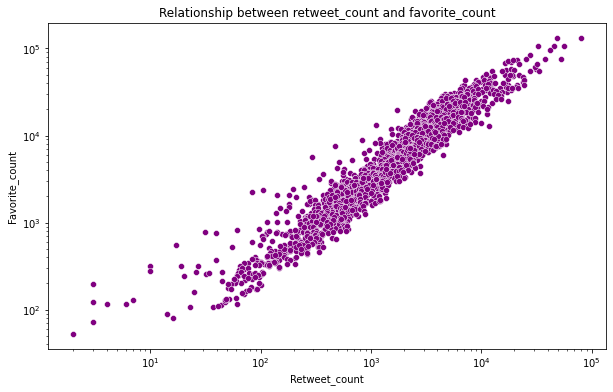

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="retweet_count", y="favorite_count", data=clean_twitter_arch, color="purple")
plt.xscale("log")
plt.yscale("log")
plt.title("Relationship between retweet_count and favorite_count")
plt.xlabel("Retweet_count")
plt.ylabel("Favorite_count");

### Rating Numerator Frequency Distribution

In [61]:
color = sns.color_palette()[1]

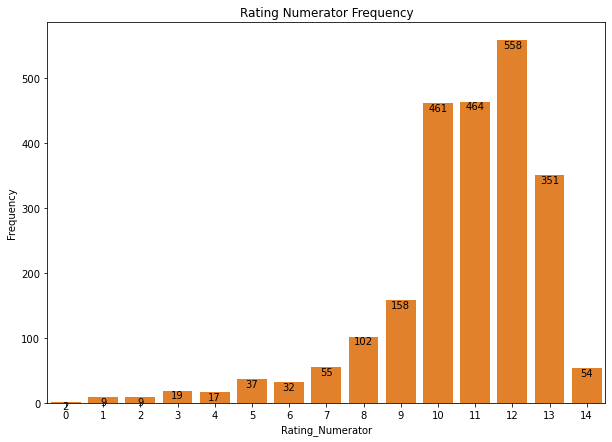

In [62]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=rating_num_15.index, y=rating_num_15.values, color=color, ax=ax)
plt.xlabel("Rating_Numerator")
plt.ylabel("Frequency")
#sns.despine(right=True)
plt.title("Rating Numerator Frequency")

# Logic to print value on each bar
for i in range(rating_num_15.shape[0]):
    count = rating_num_15[i]
    plt.text(i, count, count, ha="center", va="top");

## Insights:

1) It shows that there was a linear relationship between retweet_count and favorite_count 

2) the rating_numerator column is left skewed

3) detail information in rating_numerator column is betwween (0-15)